In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [113]:
traindata=pd.read_csv('malignant_comments_train.csv')

In [114]:
df_train=pd.DataFrame(traindata)
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


# Exploratory Data Analysison train data :

In [115]:
df_train.shape

(159571, 8)

we have 159571 rows and 8 variables in the data set

In [116]:
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

* As we can see there is a variable 'id' which is unique for each instance in the data set, This doesn't make any impact on the model
* comment_text column contains the text comments extracted from various social media platforms.
* Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
* Highly Malignant: It denotes comments that are highly malignant and hurtful.
* Rude: It denotes comments that are very rude and offensive.
* Threat: It contains indication of the comments that are giving any threat to someone.	
* Abuse: It is for comments that are abusive in nature.
* Loathe: It describes the comments which are hateful and loathing in nature.

In [117]:
df_train.sample(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
38895,67c94dd3d9a1cc29,"illustration (default would be collapsed?), so...",0,0,0,0,0,0
19588,33bb00d06c3e0010,@Taxman and kuru you have absolutely no reaso...,0,0,0,0,0,0
134406,ceb8595ee9a5c863,"""\n\n history of baku \n\nthis is table prepar...",0,0,0,0,0,0
83297,dedc663e338adaf2,Might I remind you that the basis for deciding...,0,0,0,0,0,0
25281,42e753e009ec3fce,"""It's not all of a sudden, check the article's...",0,0,0,0,0,0
74794,c811bb298f4c5e2d,"It would be polite to, yes. (talk|email)",0,0,0,0,0,0
1866,050be2af93763a03,It's not possible it was!!! All this bickering...,0,0,0,0,0,0
141075,f2dfdd50703d8fdc,unsourced biography of a living person which h...,0,0,0,0,0,0
10653,1c24adf0098fac52,"""\n\nYeah, right. You're so """"busy"""" you're an...",1,0,0,0,0,0
36067,605b15d50cc37c24,"""The old-timey socialist anarchists just don't...",0,0,0,0,0,0


In [118]:
df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

There are 2 Object type variables and 6 integer type variables

In [119]:
df_train['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [120]:
#df1=df_train.iloc[0:100000,:]
#df1.shape

In [121]:
# To understand the data in detailed we can separate the comments and labels

comment = traindata['comment_text']
comment.sample(10)

30119     "\n\nIf you look at template:cite book you can...
156537    Alessandro Venturella\nCorey pretty much admit...
75355     How's about this... Editing in such a way that...
86941     Archive created on the 29/09/2015; disscusions...
86865     So... what you're saying here is that it's a s...
128008    haitham al haddad \n\nThanks.\n\nLooks like yo...
71422     This is the second time you are adding your pe...
105285    "\nI never said I ""intend to troll the topic ...
78621     Ok, so far I have been able to find a couple o...
115912              Citation needed in Kanmaw Kyun for hook
Name: comment_text, dtype: object

In [122]:
label = traindata[['malignant','highly_malignant','rude','threat','abuse','loathe']]
label

label = np.asarray(label)

average length of comment: 394.139


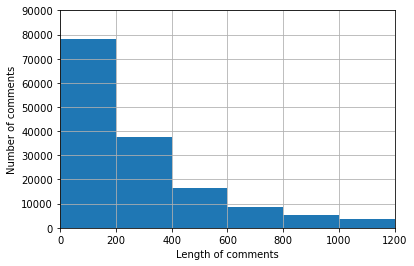

In [123]:
#checking for number of comments whose length varies from 0 to 1200 

x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

0    144277
1     15294
Name: malignant, dtype: int64


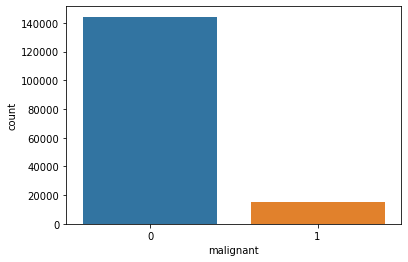

In [124]:
#Let us analyze the labels and their frequencies now

sns.countplot(df_train['malignant'])
print(df_train['malignant'].value_counts())

0    157976
1      1595
Name: highly_malignant, dtype: int64


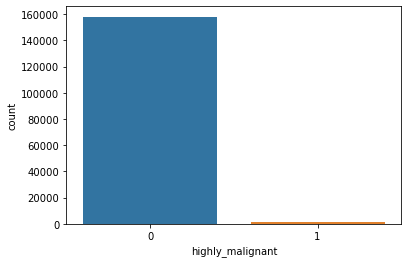

In [125]:
sns.countplot(df_train['highly_malignant'])
print(df_train['highly_malignant'].value_counts())

0    151122
1      8449
Name: rude, dtype: int64


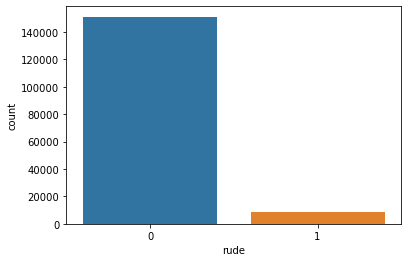

In [126]:
sns.countplot(df_train['rude'])
print(df_train['rude'].value_counts())

0    159093
1       478
Name: threat, dtype: int64


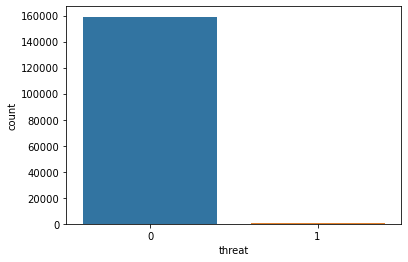

In [127]:
sns.countplot(df_train['threat'])
print(df_train['threat'].value_counts())

0    151694
1      7877
Name: abuse, dtype: int64


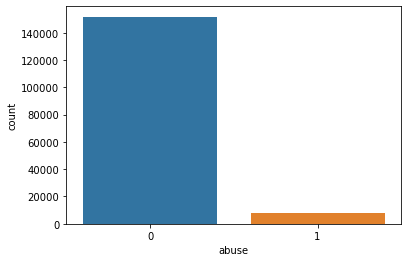

In [128]:
sns.countplot(df_train['abuse'])
print(df_train['abuse'].value_counts())

0    158166
1      1405
Name: loathe, dtype: int64


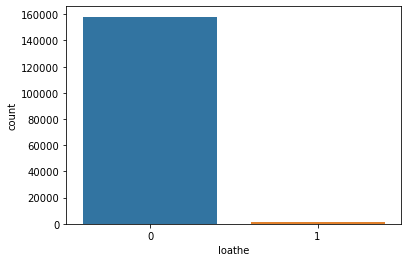

In [129]:
sns.countplot(df_train['loathe'])
print(df_train['loathe'].value_counts())

In [130]:
#Let us set the threshold as 400 characters for the length or comments and remove the comments which are more than that

comments = []
labels = []

for ix in range(comment.shape[0]):
    if len(comment[ix])<=400:
        comments.append(comment[ix])
        labels.append(label[ix])

In [131]:
len(comments)

115893

In [132]:
len(labels)

115893

In [133]:
labels = np.asarray(labels)

In [134]:
#Preparing a string containing all punctuations to be removed

import string
print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [135]:
pip install stop-words

In [136]:
# Updating the list of stop words

from stop_words import get_stop_words
stop_words = get_stop_words('english')
stop_words.append('')

for x in range(ord('b'), ord('z')+1):
    stop_words.append(chr(x))

In [137]:
print (stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [138]:
# stemming and Lemmatizing

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [139]:
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91994\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [140]:
#punctuation removal,splitting the words by space,applying stemmer and lemmatizer,recombining the words again for further processing

for i in range(len(comments)):
    comments[i] = comments[i].lower().translate(trantab)
    l = []
    for word in comments[i].split():
        l.append(stemmer.stem(lemmatiser.lemmatize(word,pos="v")))
    comments[i] = " ".join(l)

In [141]:
#Applying Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

#create object supplying our custom stop words
count_vector = CountVectorizer(stop_words=stop_words)

In [142]:
#fitting it to converts comments into bag of words format
tf = count_vector.fit_transform(comments)
tf

<115893x72292 sparse matrix of type '<class 'numpy.int64'>'
	with 1570524 stored elements in Compressed Sparse Row format>

In [143]:
tf.shape

(115893, 72292)

In [144]:
#splitting train and test data

x_train = tf
y_train = labels

# Test data

In [145]:
testdata=pd.read_csv('malignant_comments_test.csv')

In [146]:
testdata

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [147]:
comment1=testdata['comment_text']

In [148]:
comment1

0         Yo bitch Ja Rule is more succesful then you'll...
1         == From RfC == \n\n The title is fine as it is...
2         " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3         :If you have a look back at the source, the in...
4                 I don't anonymously edit articles at all.
                                ...                        
153159    . \n i totally agree, this stuff is nothing bu...
153160    == Throw from out field to home plate. == \n\n...
153161    " \n\n == Okinotorishima categories == \n\n I ...
153162    " \n\n == ""One of the founding nations of the...
153163    " \n :::Stop already. Your bullshit is not wel...
Name: comment_text, Length: 153164, dtype: object

average length of comment1: 364.875


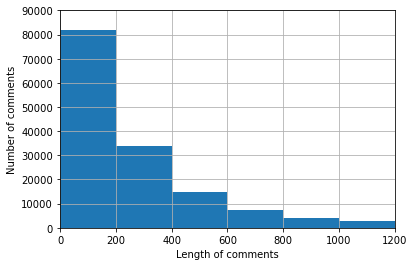

In [149]:
x = [len(comment1[i]) for i in range(comment1.shape[0])]

print('average length of comment1: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

In [150]:
comments1 = []

for ix in range(comment1.shape[0]):
    if len(comment1[ix])<=400:
        comments1.append(comment1[ix])

In [151]:
#Preparing a string containing all punctuations to be removed

print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [152]:
# Updating the list of stop words

stop_words = get_stop_words('english')
stop_words.append('')

for x in range(ord('b'), ord('z')+1):
    stop_words.append(chr(x))

In [153]:
print (stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [154]:
#punctuation removal,splitting the words by space,applying stemmer and lemmatizer,recombining the words again for further processing

for i in range(len(comments1)):
    comments1[i] = comments1[i].lower().translate(trantab)
    l = []
    for word in comments1[i].split():
        l.append(stemmer.stem(lemmatiser.lemmatize(word,pos="v")))
    comments1[i] = " ".join(l)

In [155]:
#Applying Count Vectorizer

#create object supplying our custom stop words
count_vector = CountVectorizer(stop_words=stop_words)

In [156]:
#fitting it to converts comments into bag of words format
tf1 = count_vector.fit_transform(comments1)
tf1.shape

(115769, 95799)

In [157]:
x_test=tf1[:,0:72292]

In [158]:
pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.


In [159]:
x_train.shape,y_train.shape,x_test.shape

((115893, 72292), (115893, 6), (115769, 72292))

1. BR method with MultinomialNB()

In [160]:
from skmultilearn.problem_transform import BinaryRelevance

# model
clf = []
for ix in range(6):
    clf.append(MultinomialNB())
    clf[ix].fit(x_train,y_train[:,ix])
    
# prediction
predict = []
for ix in range(6):
    predict.append(clf[ix].predict(x_test))

predict = np.asarray(np.transpose(predict))
print(predict.shape)

(115769, 6)


In [161]:
def evaluate_score(y_test,predict): 
    loss = hamming_loss(y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(y_test,predict)
    except :
        loss = log_loss(y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

In [162]:
# Scores
evaluate_score(y_test,predict)

Hamming_loss : 0.0
Accuracy : 100.0
Log_loss : 9.551524148835718
